<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial8.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D4_Paleoclimate/student/W1D4_Tutorial8.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Bonus Tutorial 8: Paleoclimate Models
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Rieke Schäfer, Chi Zhang, Ohad Zivan

**Content editors:** Yosmely Bermúdez, Paul Heubel, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

So far today, we've been focusing on how proxy-based reconstructions can be used to understand past variations in Earth's climate sytem. However, another useful tool in paleoclimate is the use of climate models.  

In this tutorial, you'll explore data from the [Paleoclimate Modelling Intercomparison Project 3 (PMIP3)](https://www.nature.com/articles/nclimate1456). More specifically, you'll be analyzing global mean surface temperature (GMST) data from  simulations for the past 1,000 years.

You'll also compare the PMIP3 GMST data to a proxy-based reconstruction of temperature from Lake Tanganyika in East Africa [(Tierney et al., 2010)](https://www.nature.com/articles/ngeo865). Through this proxy-model comparison, you'll be able to assess the differences and similarities between the two datasets.


By the end of this tutorial you will be able to:

*   Plot time series of paleoclimate model simulations
*   Compare and interpret proxy-based reconstructions of climate to paleoclimate model simulations of climate




# Setup

In [24]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

!pip install pyleoclim

In [25]:
# imports

# for Google Colab users: you might get a numpy.dtype error here, restart your session and rerun the code and it should solve it.
import pandas as pd
import matplotlib.pyplot as plt
import pooch
import os
import tempfile
import pyleoclim as pyleo

In [26]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D4_T8"

In [27]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [28]:
# @title Helper functions

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W1D4_Paleoclimate"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [29]:
# @title Video 1: Paleoclimate Models

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'ZHWUsEvOCfc'), ('Bilibili', 'BV1Tj411f7pi')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [30]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Paleoclimate_Models_Video")

In [31]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "7p3zv"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/7p3zv/


In [32]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Paleoclimate_Models_Slides")


# Section 1: Load Proxy-Based Temperature Reconstructions

The proxy record we'll be analyzing in this tutorial is a 1,000 year-long lake surface temperature reconstruction from [Tierney et al., 2010](https://https://doi.org/10.1038/ngeo865). This record is from Lake Taganyika in equatorial East Africa and is based on the [TEX86 ratio](https://en.wikipedia.org/wiki/TEX86), which is a temperature proxy derived from the distribution of the isoprenoid glycerol dialkyl glycerol tetraether (iGDGT) of archaeal membrane lipids. The organisms producing these iGDGT compounds alter the structure of the compound in response to changes in temperature, so by measuring changes in the ratio of the different compounds, we can infer past changes in temperature.   

Let's start by loading the proxy data, saving it as a `Series` in Pyleoclim, and plotting a time series.

In [33]:
filename_tang = "tang_sst.csv"
url_tang = "https://osf.io/p8tx3/download"
proxy_temp = pd.read_csv(pooch_load(filelocation=url_tang, filename=filename_tang))
proxy_temp.head()

,Year,LST
0,1996,25.7
1,1986,25.6
2,1976,25.0
3,1966,24.6
4,1956,24.5


Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [yrs]', ylabel='Surface Temperature [ºC]'>)

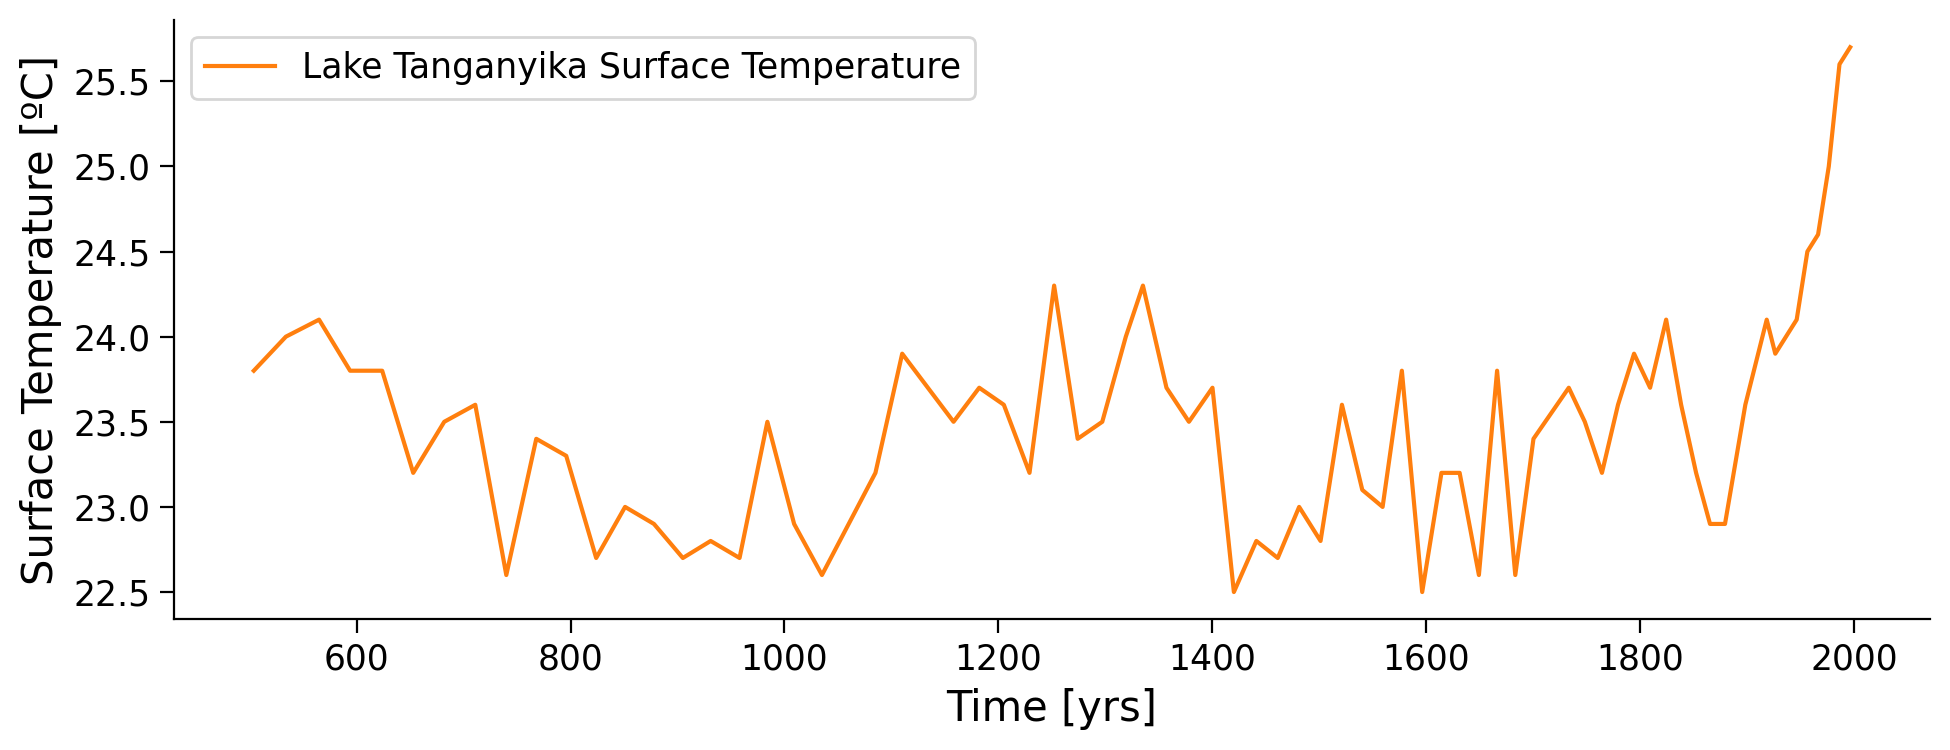

In [34]:
proxy_t = pyleo.Series(
    time=proxy_temp["Year"],
    value=proxy_temp["LST"],
    time_name="Time",
    time_unit="yrs",
    value_name="Surface Temperature",
    value_unit="ºC",
    label="Lake Tanganyika Surface Temperature",
)

proxy_t.plot(color="C1")

## Questions 1

Let's make some initial observations about the data:

1. What is the overall temperature trend over the past 2,000 years? Where are the major increases or decrease in temperature?
2. What could be the cause of these shifts in lake surface temperature?


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D4_Paleoclimate/solutions/W1D4_Tutorial8_Solution_243939d2.py)



In [35]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

# Section 2: Last Millenium PMIP3 GMST Data

We can now load GMST anomaly data from the PMIP3 simulations for the past 1,000 years ([Braconnot et al., 2012](https://doi.org/10.1038/nclimate1456) and [PAGES 2k-PMIP3 group, 2015](https://cp.copernicus.org/articles/11/1673/2015/)). The anomalies are computed compared to the mean of the time series over the full length of temporal overlap between simulations.


In [36]:
# load the raw data 'PMIP3_GMST.txt'
filename_PMIP3 = "PMIP3_GMST.txt"
url_PMIP3 = "https://osf.io/gw2m5/download"
df = pd.read_table(pooch_load(filelocation=url_PMIP3, filename=filename_PMIP3))

# display the raw data
df

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,GISS-E2-R_r1i1p121,GISS-E2-R_r1i1p127,...,CESM_member_1,CESM_member_2,CESM_member_3,CESM_member_4,CESM_member_5,CESM_member_6,CESM_member_7,CESM_member_8,CESM_member_9,CESM_member_10
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,0.116333,0.155407,...,0.036672,0.067692,0.085340,-0.000616,0.157021,0.048458,0.038173,-0.027151,0.143404,-0.053464
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,0.068174,0.210337,...,0.246816,0.181400,0.251417,0.170710,0.165139,0.324856,0.191677,0.120951,0.216921,0.068698
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,0.060088,0.240585,...,0.187429,0.065922,0.190229,0.264551,0.092629,0.386593,0.068904,0.292246,0.101564,0.200259
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.074396,0.030596,...,0.202443,0.089054,-0.031298,0.205805,0.049447,0.023312,-0.041356,0.206064,0.212954,0.288272
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.402800,-0.330589,...,0.062795,0.137882,-0.233049,-0.227240,-0.156577,-0.339176,-0.103825,0.058420,-0.006102,-0.006619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the data file includes several ensemble members for [Community Earth System Model (CESM)](https://www.cesm.ucar.edu/) and [Goddard Institute for Space Studies (GISS)](https://www.giss.nasa.gov/) simulations. Ensembles are essentially groups of climate model simulations used for climate projections, or in this case, reconstructions. You will learn about this in much more detail on W1D5: Climate Modeling.

For now, we can replace these with their ensemble mean series.


In [37]:
# create a new pandas.DataFrame to store the processed data
df_new = df.copy()

# remove the data columns for CESM and GISS ensemble members
for i in range(10):
    df_new = df_new.drop([f"CESM_member_{i+1}"], axis=1)

df_new = df_new.drop(["GISS-E2-R_r1i1p127.1"], axis=1)
df_new = df_new.drop(["GISS-E2-R_r1i1p127"], axis=1)
df_new = df_new.drop(["GISS-E2-R_r1i1p121"], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
df_new["CESM"] = df[
    [
        "CESM_member_1",
        "CESM_member_2",
        "CESM_member_3",
        "CESM_member_4",
        "CESM_member_5",
        "CESM_member_6",
        "CESM_member_7",
        "CESM_member_8",
        "CESM_member_9",
        "CESM_member_10",
    ]
].mean(axis=1)

df_new["GISS"] = df[
    [
        "GISS-E2-R_r1i1p127.1",
        "GISS-E2-R_r1i1p127",
        "GISS-E2-R_r1i1p121",
    ]
].mean(axis=1)

In [38]:
# display the processed data
df_new

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In our new dataframe, you can now see that the ensemble members for CESM and GISS are now replaced with one ensemble mean for each model simulation.



Now we can create a Pyleoclim `Series` object for each simulated GMST time series, which will allow us to easily plot the time series for each simulation and perform data analysis using various built-in tools.

In [39]:
# store each pyleoclim.Series() object into a dictionary
ts_dict = {}
for name in df_new.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=df_new["Year"].values,  # the time axis
        value=df_new[name].values,  # the value axis
        label=name,  # optional metadata: the nickname of the series
        time_name="Time",  # optional metadata: the name of the time axis
        time_unit="yrs",  # optional metadata: the unit of the time axis
        value_name="GMST anomaly",  # optional metadata: the name of the value axis
        value_unit="ºC",  # optional metadata: the unit of the value axis
    )

NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order


We can now plot each simulation. For example, let's plot the CCSM4 GMST anomaly:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [yrs]', ylabel='GMST anomaly [ºC]'>)

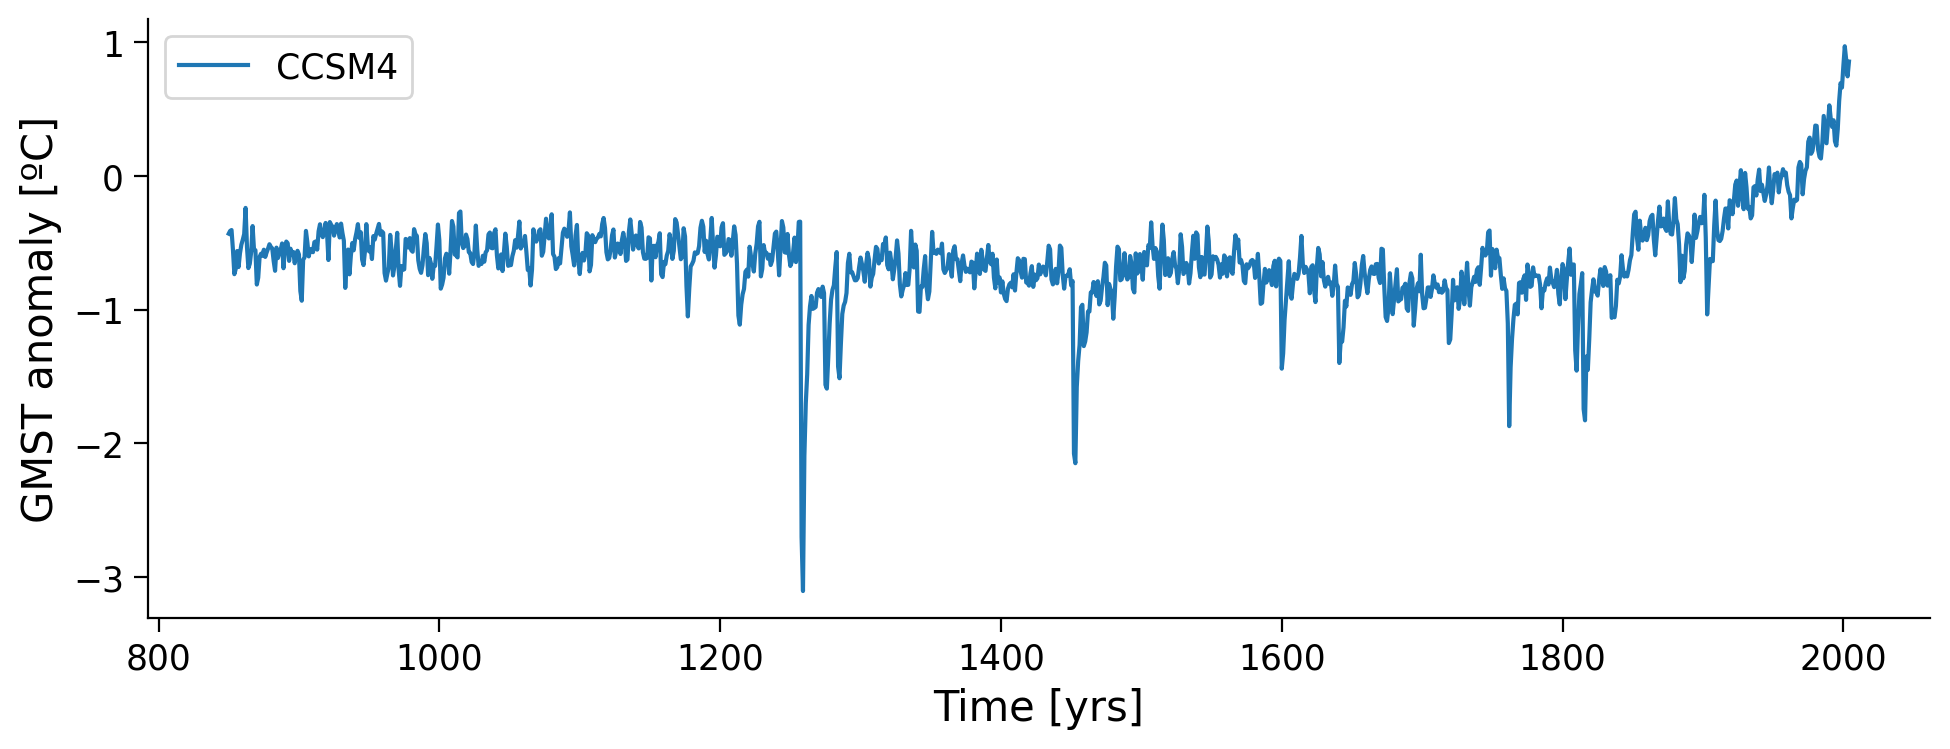

In [40]:
ts_dict["CCSM4"].plot()

But what if we wanted to plot all of the PMIP3 time series at once? We can do that using the `MultipleSeries` object in Pyleoclim, which takes a list of `Series` objects as input. To do so, we have to convert the dictionary of `Series` into a list and then create a `MultipleSeries` object.

In [41]:
ts_list = [
    v for k, v in ts_dict.items()
]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)

We can now plot all PMIP3 simulation time series at once:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [yrs]', ylabel='GMST anomaly [ºC]'>)

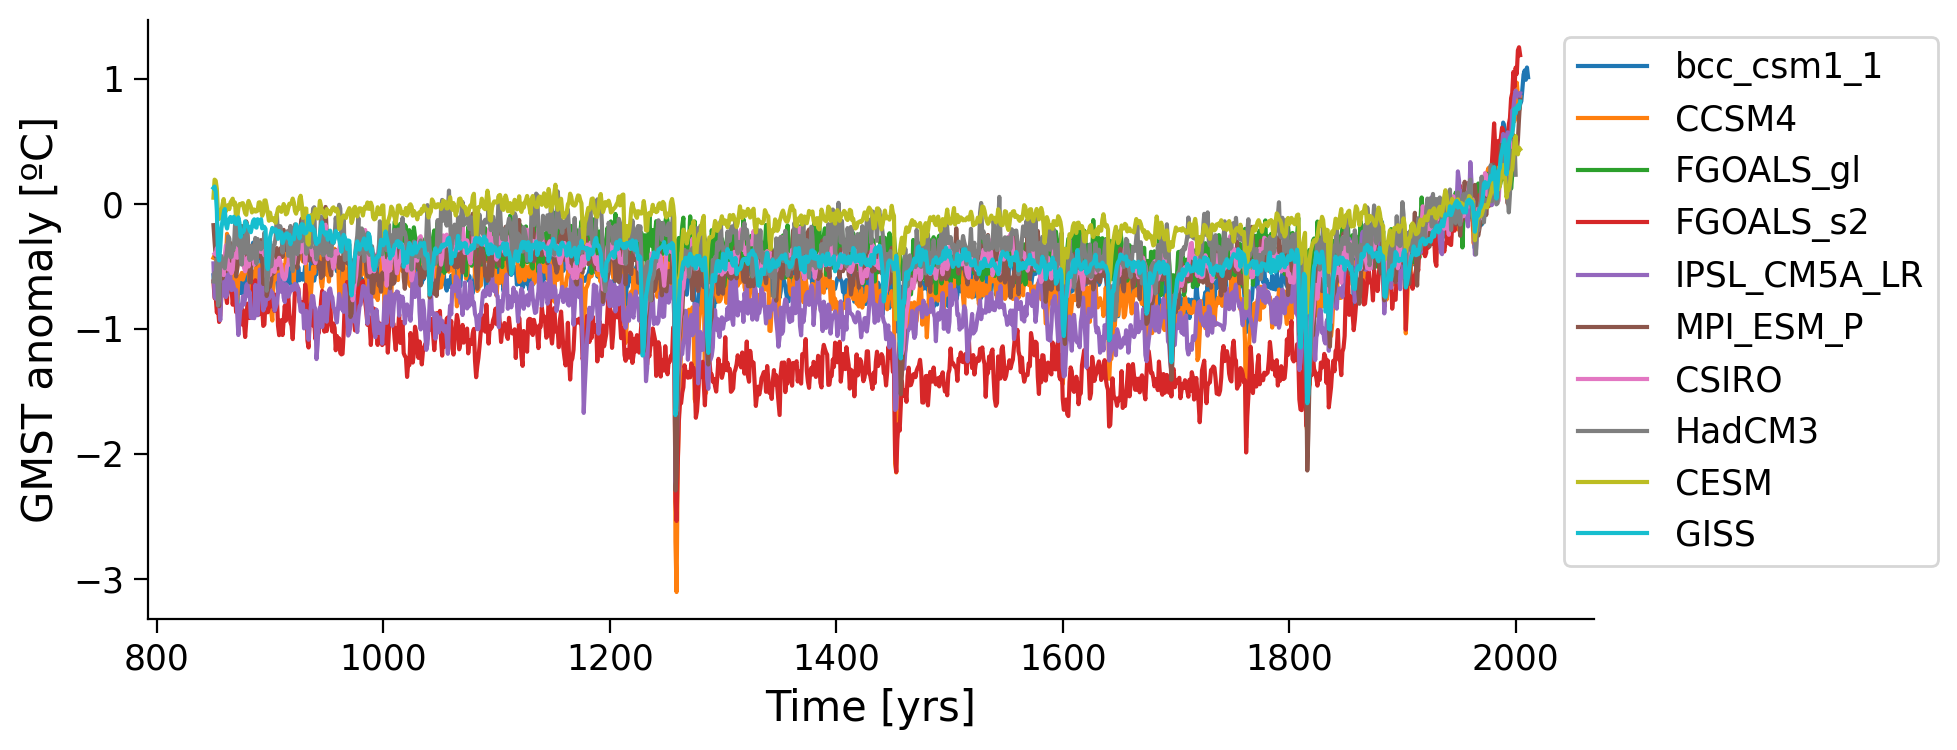

In [42]:
ms_pmip.plot(
    lgd_kwargs={
        "bbox_to_anchor": (1.25, 1),  # move the legend to the right side
    }
)

Note that like the paleo proxy data we have looked at, these model simulations are also referred to as reconstructions as they are attempts to recreate past climates.

The reconstructed GMST anomalies from all of the PMIP3 simulations follow the same overall trend of relatively stable, long-term temperature from 800-1800 AD, followed by an increase in temperature over the past 200 years. What do you think is driving this recent warming trend?

Despite the long-term similarities, there are also noticeable differences between the GMST time series from each simulation.  

## Questions 2: Climate Connection

1.   How are the GMST anomalies from each simulation different? What could be causing these differences?
4.   How do we know which simulation is the most accurate and reliable?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D4_Paleoclimate/solutions/W1D4_Tutorial8_Solution_c7fb7c84.py)



In [43]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2")

# Section 3: Proxy-Model Comparisons

Proxy-based reconstructions of climate variables in the past can provide direct measurements of temperature, precipitation, greenhouse gas concentration, etc. Comparing proxy paleoclimate records with paleoclimate model simulations can help to clarify the interpretation of the proxy record and also help to improve the ability of climate models to simulate past variations in climate.

Here, we'll compare the proxy-based Lake Tanganyika surface temperature reconstruction we downloaded and plotted at the beginning of the tutorial, with the GMST anomaly PMIP3 simulations. But first, we need to standardize the Lake Tanganyika data since we're comparing the data to the GMST anomaly.

In [44]:
# standardize the proxy data
proxy_stnd = proxy_t.standardize()

(-4.0, 2.0)

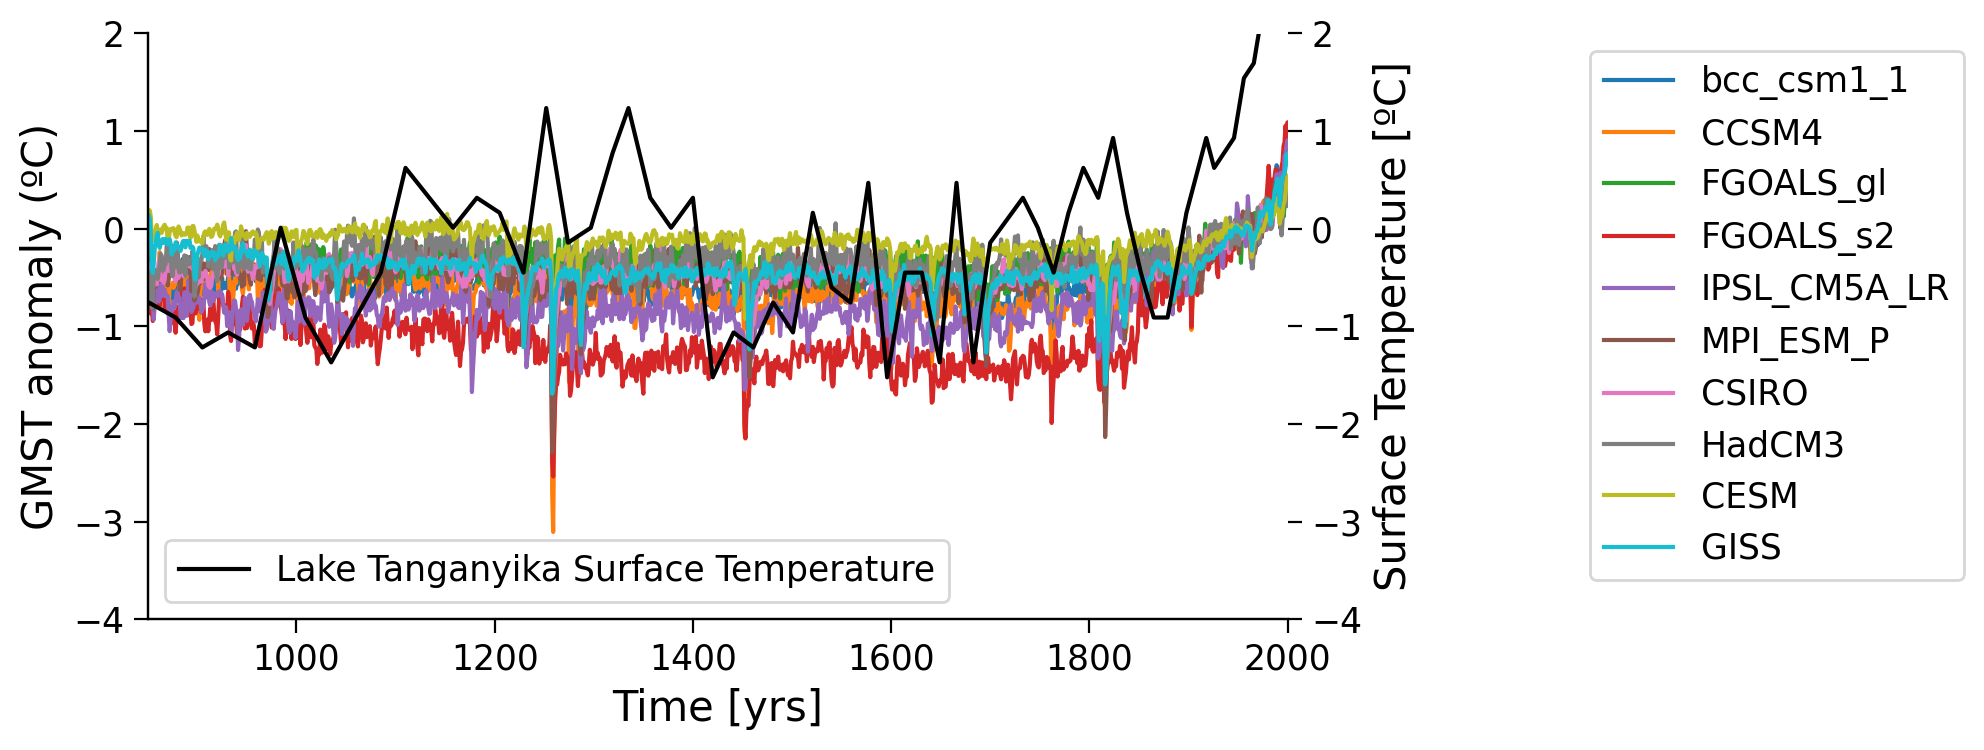

In [45]:
fig, ax = ms_pmip.plot(
    lgd_kwargs={
        "bbox_to_anchor": (1.25, 1),  # move the legend to the right side
    }
)

ax.set_ylabel("GMST anomaly (ºC)")
ax1 = ax.twinx()  # create a second axes that shares the same x-axis
ax1.set_ylabel("Tanganyika Surface Temperature Anomaly (ºC)")

proxy_stnd.plot(ax=ax1, color="black")
ax.set_xlim(xmin=850, xmax=2000)
ax.set_ylim(ymin=-4, ymax=2)
ax1.set_ylim(ymin=-4, ymax=2)

## Questions 3: Climate Connection

How do the model simulated GMST and proxy-based surface temperature compare?


1.  Is there more variability in the proxy or model temperatures? What might be causing this?
2.  Are the long-term trends over the last millenium in the simulated GMST anomaly and proxy-based surface temperature record similar or different?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D4_Paleoclimate/solutions/W1D4_Tutorial8_Solution_278fb208.py)



In [46]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_3")

This is just one simplified example of a proxy-model comparison. Larger-scale proxy-model comparisons can help to identify spatial patterns of temperature change and assess forcing mechanisms of paleoclimate variations. In W2D1, you'll spend more time exploring climate models.

# Summary
In this tutorial, you explored the role of climate models in paleoclimate research, particularly focusing on data from PMIP3. You learned to analyze and plot time series of paleoclimate model simulations, specifically GMST anomaly data from the past 1,000 years. This data reveals a trend of relatively stable global mean surface temperature anomalies from 800-1800 AD, followed by a noticeable rise in temperature over the last two centuries.

Furthermore, you have learned to compare this model data with proxy-based reconstructions. Using the example of temperature data from Lake Tanganyika in East Africa, we've assessed the differences and similarities between the model and proxy data. This process not only enhances our interpretation of the proxy record but also improves our understanding of how well climate models simulate past climate variations.

In the next and final tutorial for today, you'll explore another tool for assessing past climate variability using both proxies and models.

# Resources

Code for this tutorial is based on existing notebooks from LinkedEarth that explore [paleoclimate model-data comparisons](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb08_Model-DataConfrontationInTimeDomain.ipynb) using [PMIP3 model simulations](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb07_Model-DataConfrontationInFrequencyDomain.ipynb).

Data from the following sources are used in this tutorial:

*   Braconnot, P., Harrison, S., Kageyama, M. et al. Evaluation of climate models using palaeoclimatic data. Nature Clim Change 2, 417–424 (2012). https://doi.org/10.1038/nclimate1456
*   Tierney, J., Mayes, M., Meyer, N. et al. Late-twentieth-century warming in Lake Tanganyika unprecedented since AD 500. Nature Geosci 3, 422–425 (2010). https://doi.org/10.1038/ngeo865